In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer


In [2]:
# Read the CSV file
df = pd.read_csv('hospital_readmissions.csv')

In [3]:
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (25000, 17)

Data Types:
age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

Missing Values:
age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [4]:
# Convert readmitted to binary (yes/no)
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

In [5]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency    readmitted  
count  25000.000000  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600      0.470160  
std        1.195478      1.177951      0.885873      0.499119  
min        0.000000      0.000000      0.000000      0.000

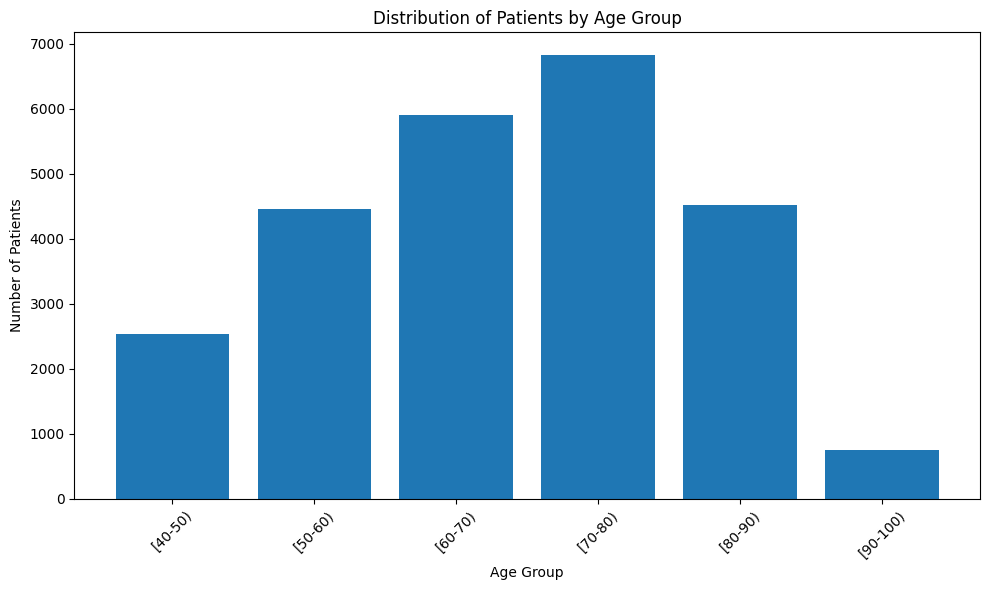

In [8]:
# 1. EXPLORATORY DATA ANALYSIS

# 1.1 Age Distribution
plt.figure(figsize=(10, 6))
age_counts = df['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values)
plt.title('Distribution of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('age_distribution.png')
plt.close()


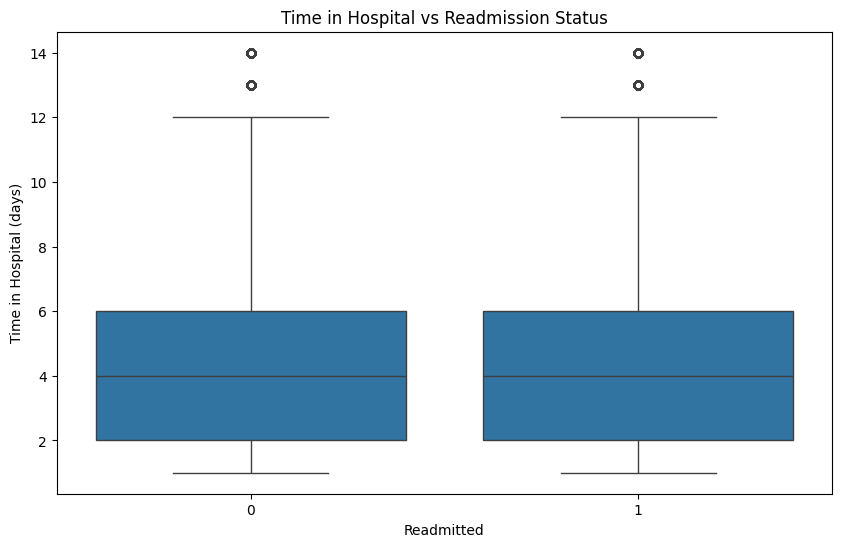

In [9]:
# 1.2 Time in Hospital vs Readmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in Hospital vs Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (days)')
plt.show()  # Display the plot
plt.savefig('time_vs_readmission.png')
plt.close()

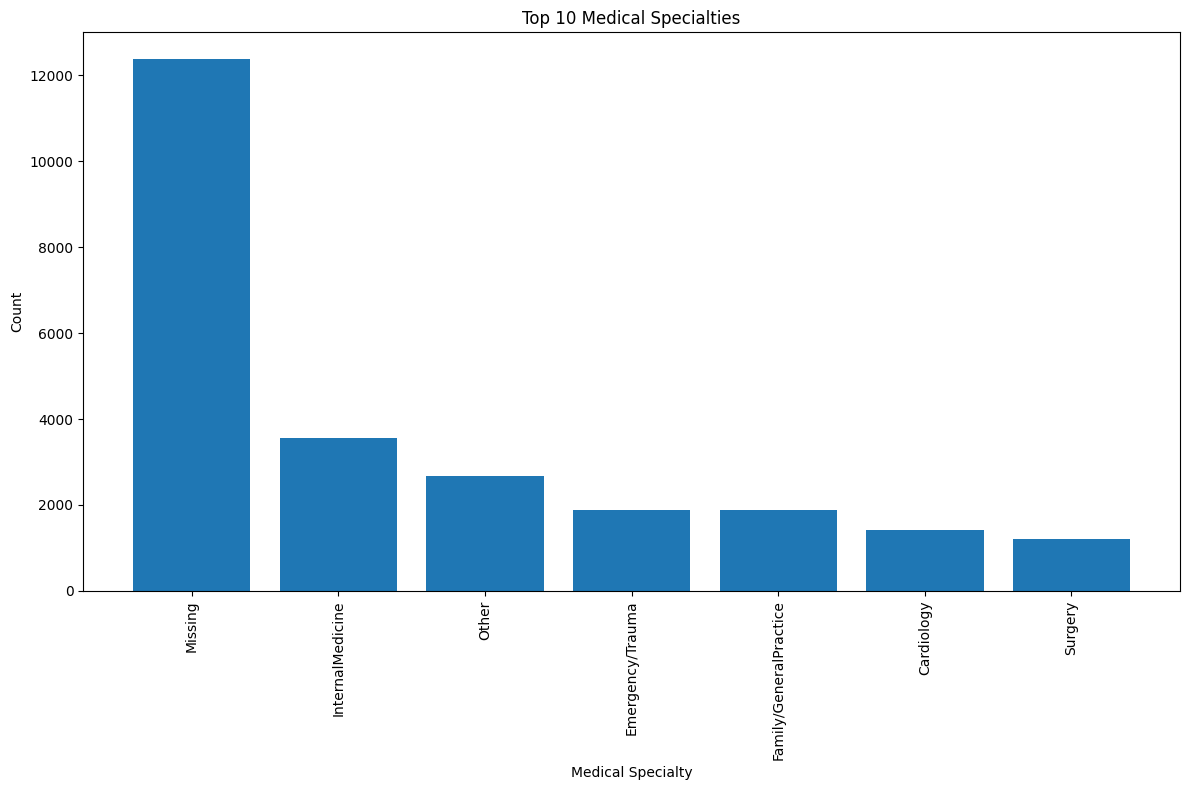

In [10]:
# 1.3 Medical Specialty Distribution
plt.figure(figsize=(12, 8))
specialty_counts = df['medical_specialty'].value_counts().head(10)
plt.bar(specialty_counts.index, specialty_counts.values)
plt.title('Top 10 Medical Specialties')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('medical_specialty.png')
plt.close()


<Figure size 1200x800 with 0 Axes>

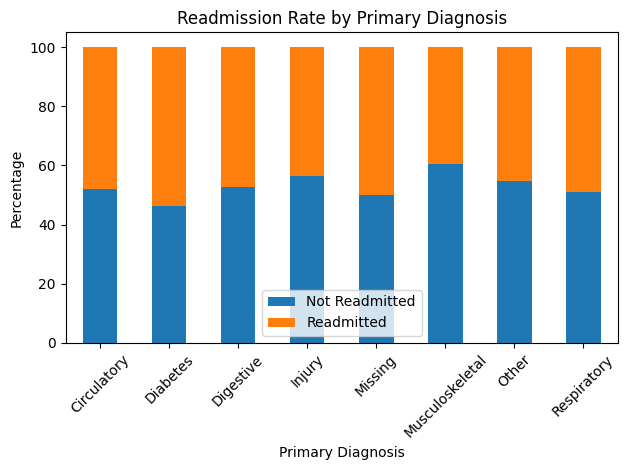

In [11]:

# 1.4 Primary Diagnosis vs Readmission
plt.figure(figsize=(12, 8))
diag_readmit = pd.crosstab(df['diag_1'], df['readmitted'])
diag_readmit_pct = diag_readmit.div(diag_readmit.sum(axis=1), axis=0) * 100
diag_readmit_pct.plot(kind='bar', stacked=True)
plt.title('Readmission Rate by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Percentage')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('diagnosis_vs_readmission.png')
plt.close()

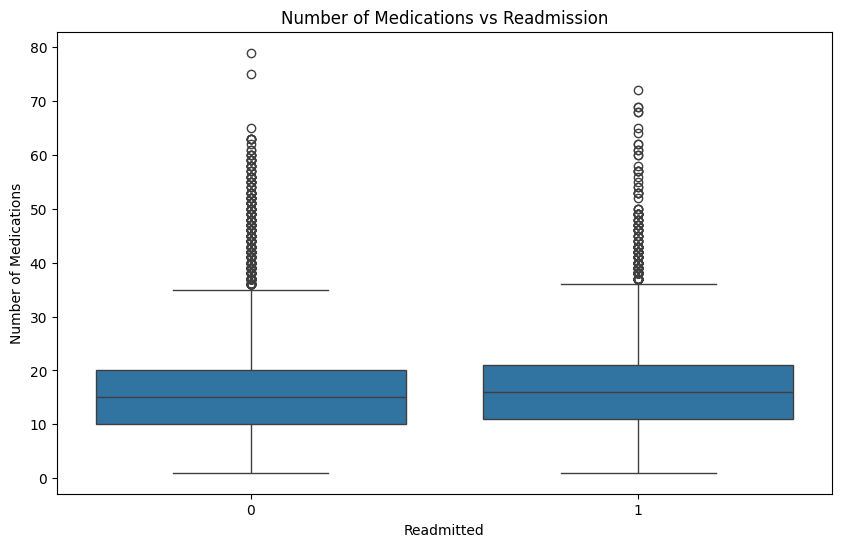

In [12]:
# 1.5 Number of Medications vs Readmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='n_medications', data=df)
plt.title('Number of Medications vs Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Number of Medications')
plt.show()  # Display the plot
plt.savefig('medications_vs_readmission.png')
plt.close()

<Figure size 1000x600 with 0 Axes>

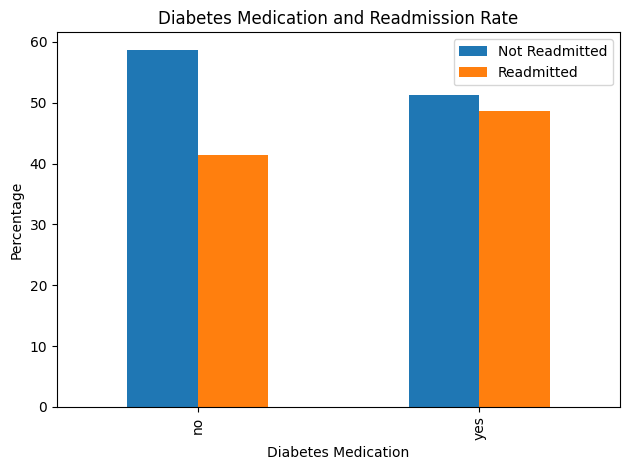

In [13]:
# 1.6 Diabetes Medication and Readmission
plt.figure(figsize=(10, 6))
diabetes_readmit = pd.crosstab(df['diabetes_med'], df['readmitted'])
diabetes_readmit_pct = diabetes_readmit.div(diabetes_readmit.sum(axis=1), axis=0) * 100
diabetes_readmit_pct.plot(kind='bar')
plt.title('Diabetes Medication and Readmission Rate')
plt.xlabel('Diabetes Medication')
plt.ylabel('Percentage')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('diabetes_med_vs_readmission.png')
plt.close()

<Figure size 1000x600 with 0 Axes>

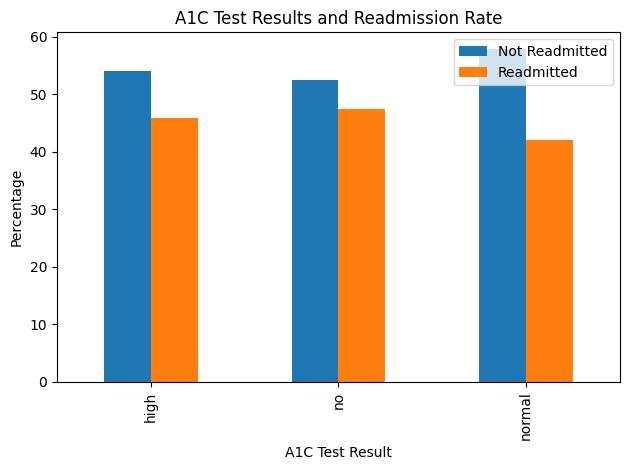

In [14]:
# 1.7 A1C Test Results and Readmission
plt.figure(figsize=(10, 6))
a1c_readmit = pd.crosstab(df['A1Ctest'], df['readmitted'])
a1c_readmit_pct = a1c_readmit.div(a1c_readmit.sum(axis=1), axis=0) * 100
a1c_readmit_pct.plot(kind='bar')
plt.title('A1C Test Results and Readmission Rate')
plt.xlabel('A1C Test Result')
plt.ylabel('Percentage')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('a1c_vs_readmission.png')
plt.close()

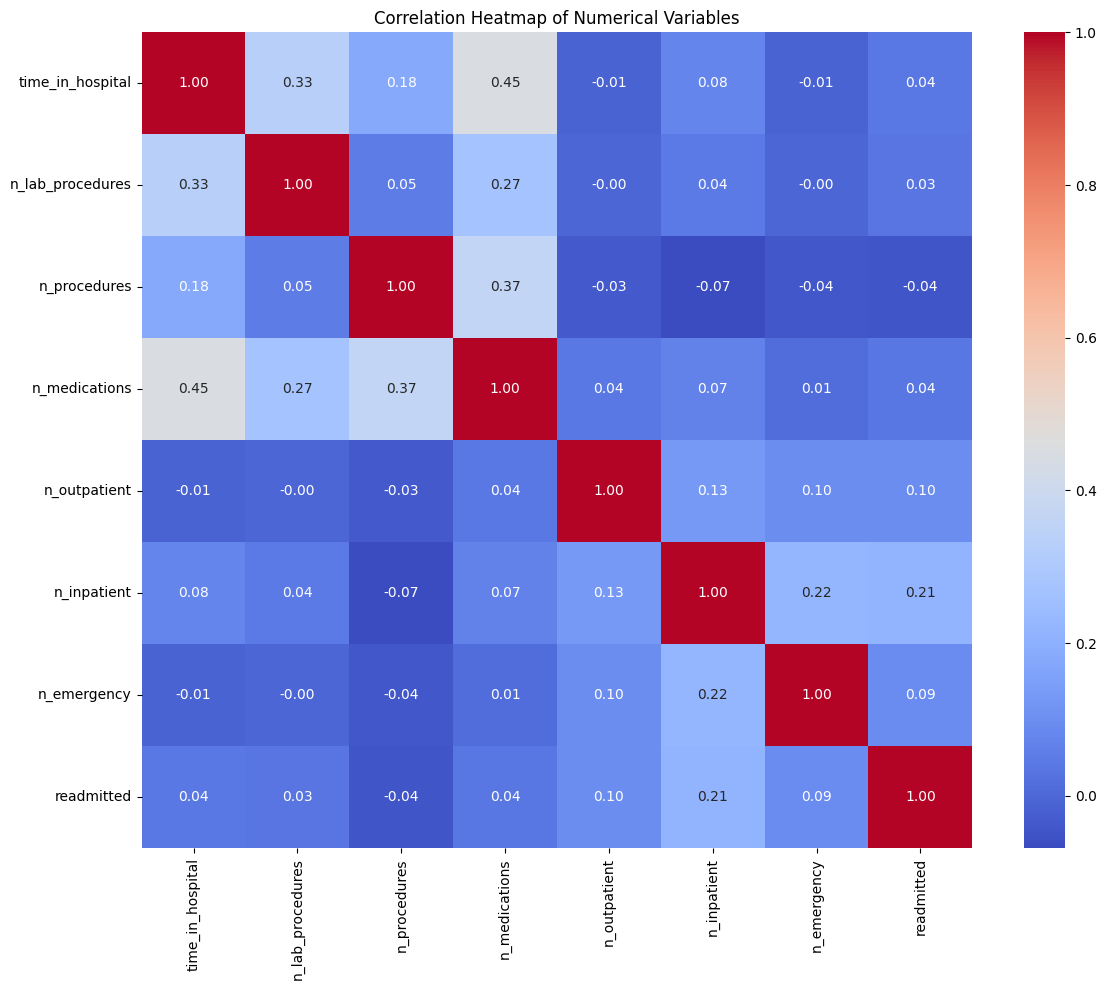

In [15]:
# 1.8 Correlation Heatmap (Numerical Variables)
plt.figure(figsize=(12, 10))
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures',
                  'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
corr_matrix = df[numerical_cols + ['readmitted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('correlation_heatmap.png')
plt.close()

In [16]:
# 2. DATA PREPARATION AND CLEANING

# 2.1 Handle missing values
# Replace 'Missing' with NaN for medical_specialty
df['medical_specialty'] = df['medical_specialty'].replace('Missing', np.nan)

# Create a cleaner dataset for modeling
df_clean = df.copy()

# 2.2 Feature Engineering
# Create a feature for total procedures
df_clean['total_procedures'] = df_clean['n_lab_procedures'] + df_clean['n_procedures']

# Create a feature for total encounters
df_clean['total_encounters'] = df_clean['n_outpatient'] + df_clean['n_inpatient'] + df_clean['n_emergency']

# Create a feature for diagnosis complexity (how many different diagnosis systems are involved)
def count_unique_diag(row):
    diags = [row['diag_1'], row['diag_2'], row['diag_3']]
    return len(set(diags))

df_clean['diag_complexity'] = df_clean.apply(count_unique_diag, axis=1)

In [17]:
# 3. PREDICTIVE MODELING

# Split the data
X = df_clean.drop(['readmitted'], axis=1)
y = df_clean['readmitted']

# Handle categorical variables
categorical_cols = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
                    'glucose_test', 'A1Ctest', 'change', 'diabetes_med']
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures',
                  'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
                  'total_procedures', 'total_encounters', 'diag_complexity']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and evaluate the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time_in_hospital',
                                                   'n_lab_procedures',
                                                   'n_procedures',
                                                   'n_medications',
                                                   'n_outpatient',
                                                   'n_inpatient', 'n_emergency',
                                                   'total_procedures',
                                                   'total_encounters',
                                                   'diag_complexity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age', 'medical_specialty',
                                                   'diag_1', 'diag_2', 'diag_3',
                                                   'glucose_test', 'A1Ctest',
                                                   'change',
                                                   'diabetes_med'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [18]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
# Evaluate the model
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))


Model Evaluation:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      4000
           1       0.58      0.51      0.54      3500

    accuracy                           0.60      7500
   macro avg       0.60      0.60      0.59      7500
weighted avg       0.60      0.60      0.60      7500



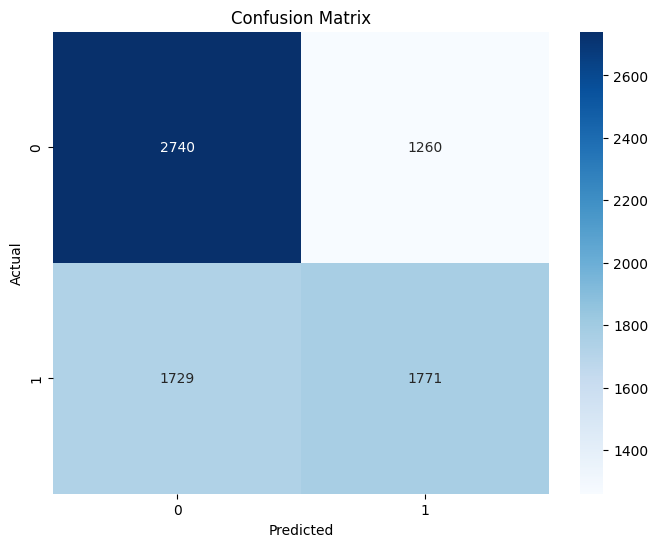

In [20]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  # Display the plot
plt.savefig('confusion_matrix.png')
plt.close()

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

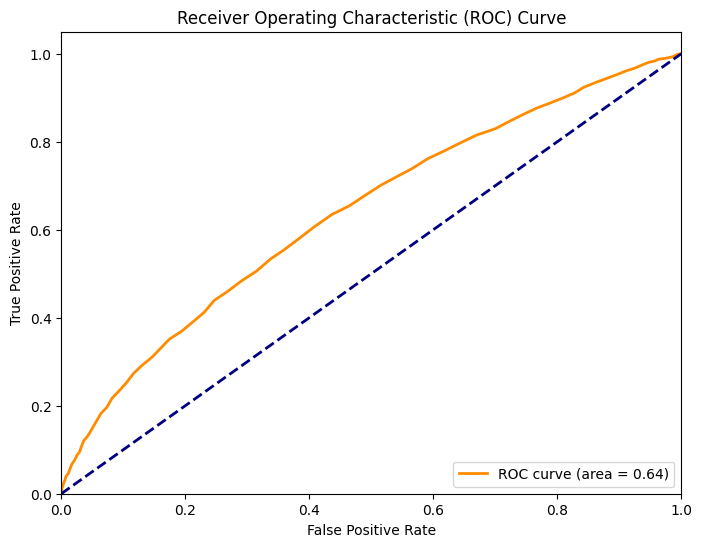

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()  # Display the plot
plt.savefig('roc_curve.png')
plt.close()

In [23]:
# Get feature importance from the random forest model
feature_names = (
    numerical_cols +
    model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()
)

importances = model.named_steps['classifier'].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 15 features
top_n = 15
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = [feature_names[i] for i in top_indices]

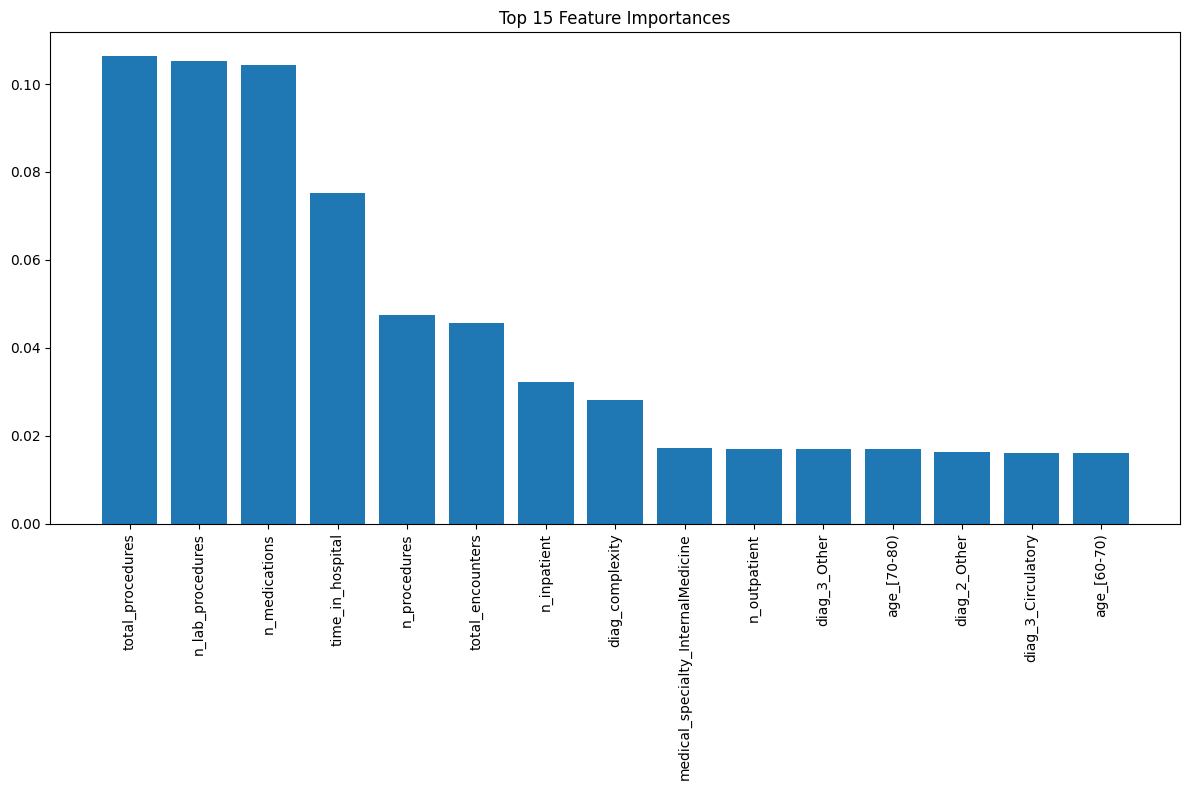

In [24]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Top 15 Feature Importances')
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.tight_layout()
plt.show()  # Display the plot
plt.savefig('feature_importance.png')
plt.close()

In [25]:
# 5. INSIGHTS SUMMARY

print("\n=== Key Insights for Readmission Prediction ===")
print("\n1. Patient Demographics:")
age_readmit = df.groupby('age')['readmitted'].mean().sort_values(ascending=False)
print(f"  - Age groups with highest readmission rates: {age_readmit.index[0]} ({age_readmit.values[0]:.2%}), {age_readmit.index[1]} ({age_readmit.values[1]:.2%})")

print("\n2. Clinical Factors:")
time_readmit_corr = df['time_in_hospital'].corr(df['readmitted'])
print(f"  - Correlation between time in hospital and readmission: {time_readmit_corr:.4f}")

diag_readmit = df.groupby('diag_1')['readmitted'].mean().sort_values(ascending=False)
print(f"  - Primary diagnoses with highest readmission rates: {diag_readmit.index[0]} ({diag_readmit.values[0]:.2%}), {diag_readmit.index[1]} ({diag_readmit.values[1]:.2%})")

print("\n3. Treatment Factors:")
med_readmit_corr = df['n_medications'].corr(df['readmitted'])
print(f"  - Correlation between number of medications and readmission: {med_readmit_corr:.4f}")

diabetes_readmit = df.groupby('diabetes_med')['readmitted'].mean()
print(f"  - Readmission rate with diabetes medication: {diabetes_readmit['yes']:.2%}")
print(f"  - Readmission rate without diabetes medication: {diabetes_readmit['no']:.2%}")

print("\n4. Hospital Encounter History:")
inpatient_readmit_corr = df['n_inpatient'].corr(df['readmitted'])
emergency_readmit_corr = df['n_emergency'].corr(df['readmitted'])
print(f"  - Correlation between previous inpatient visits and readmission: {inpatient_readmit_corr:.4f}")
print(f"  - Correlation between previous emergency visits and readmission: {emergency_readmit_corr:.4f}")



=== Key Insights for Readmission Prediction ===

1. Patient Demographics:
  - Age groups with highest readmission rates: [80-90) (49.58%), [70-80) (48.79%)

2. Clinical Factors:
  - Correlation between time in hospital and readmission: 0.0431
  - Primary diagnoses with highest readmission rates: Diabetes (53.63%), Missing (50.00%)

3. Treatment Factors:
  - Correlation between number of medications and readmission: 0.0369
  - Readmission rate with diabetes medication: 48.72%
  - Readmission rate without diabetes medication: 41.35%

4. Hospital Encounter History:
  - Correlation between previous inpatient visits and readmission: 0.2125
  - Correlation between previous emergency visits and readmission: 0.0935


In [26]:
# Save all important insights to a text file
with open('readmission_insights.txt', 'w') as f:
    f.write("=== Hospital Readmission Analysis Key Insights ===\n\n")

    f.write("1. PATIENT DEMOGRAPHICS\n")
    f.write(f"  - Age groups with highest readmission rates: {age_readmit.index[0]} ({age_readmit.values[0]:.2%}), {age_readmit.index[1]} ({age_readmit.values[1]:.2%})\n\n")

    f.write("2. CLINICAL FACTORS\n")
    f.write(f"  - Correlation between time in hospital and readmission: {time_readmit_corr:.4f}\n")
    f.write(f"  - Primary diagnoses with highest readmission rates: {diag_readmit.index[0]} ({diag_readmit.values[0]:.2%}), {diag_readmit.index[1]} ({diag_readmit.values[1]:.2%})\n\n")

    f.write("3. TREATMENT FACTORS\n")
    f.write(f"  - Correlation between number of medications and readmission: {med_readmit_corr:.4f}\n")
    f.write(f"  - Readmission rate with diabetes medication: {diabetes_readmit['yes']:.2%}\n")
    f.write(f"  - Readmission rate without diabetes medication: {diabetes_readmit['no']:.2%}\n\n")

    f.write("4. HOSPITAL ENCOUNTER HISTORY\n")
    f.write(f"  - Correlation between previous inpatient visits and readmission: {inpatient_readmit_corr:.4f}\n")
    f.write(f"  - Correlation between previous emergency visits and readmission: {emergency_readmit_corr:.4f}\n\n")

    f.write("5. PREDICTIVE MODEL PERFORMANCE\n")
    f.write(f"  - Model accuracy on test data: {(y_test == y_pred).mean():.2%}\n")
    f.write(f"  - Area under ROC curve: {roc_auc:.4f}\n\n")

    f.write("6. TOP PREDICTORS OF READMISSION\n")
    for i in range(min(5, len(top_features))):
        f.write(f"  - {top_features[i]}: {top_importances[i]:.4f}\n")

print("\nAnalysis complete! All visualizations and insights have been saved.")


Analysis complete! All visualizations and insights have been saved.
